In [8]:
import math
import pandas as pd
import numpy as np
from collections import defaultdict
from pathlib import Path
import sys
import os

## Naive Bayes

In [73]:
def get_probs(path, filelist, alpha, k):
    e_dict = defaultdict()
    j_dict = defaultdict()
    s_dict = defaultdict()
    for f in filelist:
        with open(path + f) as file:
            while True:
                char = file.read(1)
                if(f[0] == 'e'):
                    if(char.isalpha() or char == ' '):
                        if(char in e_dict):
                            e_dict[char] += 1
                        else:
                            e_dict[char] = 1
                elif(f[0] == 'j'):
                    if(char.isalpha() or char == ' '):
                        if(char in j_dict):
                            j_dict[char] += 1
                        else:
                            j_dict[char] = 1
                elif(f[0] == 's'):
                    if(char.isalpha() or char == ' '):
                        if(char in s_dict):
                            s_dict[char] += 1
                        else:
                            s_dict[char] = 1
                            
                if not char:
                    break
                        
    e_dict_sum = sum(e_dict.values())
    j_dict_sum = sum(j_dict.values())
    s_dict_sum = sum(s_dict.values())
    for key in e_dict:
        e_dict[key] = (e_dict[key] + alpha) / (e_dict_sum + k*alpha)
    for key in j_dict:
        j_dict[key] = (j_dict[key] + alpha) / (j_dict_sum + k*alpha)
    for key in s_dict:
        s_dict[key] = (s_dict[key] + alpha) / (s_dict_sum + k*alpha)
        
    j_dict.update({'x': (alpha / (j_dict_sum + k*alpha))})
    
    return e_dict, j_dict, s_dict

In [40]:
path = 'C://Users//ryank//School//Machine_Learning//HW4//hw4-1//train//'

filelist = os.listdir(path)

In [74]:
e_dict, j_dict, s_dict = get_probs(path, filelist, 0.5, 27)

In [75]:
e_dict, j_dict, s_dict

(defaultdict(None,
             {'o': 0.06446390219725756,
              'u': 0.026664463902197257,
              'r': 0.053824549810011564,
              ' ': 0.1792499586981662,
              's': 0.06618205848339666,
              'n': 0.057921691723112505,
              'i': 0.055410540227986124,
              'a': 0.0601685114819098,
              'm': 0.020518751032545846,
              'e': 0.1053692383941847,
              'l': 0.028977366595076822,
              'c': 0.021509995043779945,
              't': 0.08012555757475633,
              'g': 0.017478936064761277,
              'f': 0.018932760614571286,
              'h': 0.047216256401784236,
              'v': 0.009284652238559392,
              'w': 0.015496448042293078,
              'd': 0.021972575582355856,
              'y': 0.013844374690236246,
              'p': 0.01675202378985627,
              'k': 0.0037336857756484387,
              'b': 0.011134974392863043,
              'z': 0.0006277878737815959,
     

In [76]:
test_path = 'C://Users//ryank//School//Machine_Learning//HW4//hw4-1//test//'


cv_e_dict = defaultdict()

with open(test_path + 'e10.txt') as file:
    while True:
        char = file.read(1)
        if(char.isalpha() or char == ' '):
            if(char in cv_e_dict):
                cv_e_dict[char] += 1
            else:
                cv_e_dict[char] = 1

        if not char:
            break

In [77]:
cv_e_dict

defaultdict(None,
            {'e': 311,
             'x': 4,
             'c': 53,
             'p': 53,
             't': 225,
             ' ': 498,
             'w': 47,
             'h': 140,
             'n': 139,
             'i': 140,
             'd': 57,
             's': 186,
             'r': 141,
             'o': 182,
             'a': 164,
             'g': 51,
             'm': 64,
             'l': 85,
             'v': 31,
             'y': 38,
             'q': 3,
             'u': 65,
             'f': 55,
             'b': 32,
             'z': 2,
             'k': 6,
             'j': 3})

In [78]:
test_prob_e = 0
test_prob_j = 0 
test_prob_s = 0

with open(test_path + 'e10.txt') as file:
    while True:
        char = file.read(1)
        if(char.isalpha() or char == ' '):    
            test_prob_e += (cv_e_dict[char] * math.log(e_dict[char]))
            test_prob_j += (cv_e_dict[char] * math.log(j_dict[char]))
            test_prob_s += (cv_e_dict[char] * math.log(s_dict[char]))

        if not char:
            break

In [80]:
def get_post_prob(file, cv_e_dict, e_dict, j_dict, s_dict):
    test_prob_e = 0
    test_prob_j = 0 
    test_prob_s = 0

    with open(file) as file:
        while True:
            char = file.read(1)
            if(char.isalpha() or char == ' '):    
                test_prob_e += (cv_e_dict[char] * math.log(e_dict[char]))
                test_prob_j += (cv_e_dict[char] * math.log(j_dict[char]))
                test_prob_s += (cv_e_dict[char] * math.log(s_dict[char]))


            if not char:
                break
                
    return [test_prob_e * (1/3),test_prob_j*(1/3),test_prob_s*(1/3)]

In [79]:
test_prob_e, test_prob_j, test_prob_s

(-1400741.4725990642, -1585503.6136986252, -1485651.9399239856)

In [81]:
post_e = test_prob_e * (1/3)
post_j = test_prob_j * (1/3)
post_s = test_prob_s * (1/3)

post_e, post_j, post_s

(-466913.82419968804, -528501.2045662084, -495217.3133079952)

In [61]:
test_total_path = 'C://Users//ryank//School//Machine_Learning//HW4//hw4-1//test_total//'
test_filelist = os.listdir(test_total_path)

In [65]:
def convert_to_num(char):
    if(char == 'e'):
        return 0
    elif(char == 'j'):
        return 1
    elif(char == 's'):
        return 2

In [82]:
actual = []
pred = []
for f in test_filelist:
    actual.append(convert_to_num(f[0]))
    file = test_total_path + f
    post_prob_list = get_post_prob(file, cv_e_dict, e_dict, j_dict, s_dict)
    pred.append(max( (v, i) for i, v in enumerate(post_prob_list) )[1])

In [83]:
pred, actual

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2])

In [89]:
import random

original = []
with open(test_total_path + 'e12.txt') as file:
    while True:
        char = file.read(1)
        if(char.isalpha() or char==' '):
            original.append(char)
        if not char:
            break
            
scrambled = random.sample(original, k=len(original))

In [97]:
t_p_e = 0
t_p_j = 0
t_p_s = 0

for char in scrambled:
    if(char.isalpha() or char == ' '):
        t_p_e += (cv_e_dict[char] * math.log(e_dict[char]))
        t_p_j += (cv_e_dict[char] * math.log(j_dict[char]))
        t_p_s += (cv_e_dict[char] * math.log(s_dict[char]))

    else:
        break
    
print(t_p_e, t_p_j, t_p_s)

-965253.9397588029 -1086791.2946635531 -1025851.3642505035


## Neural Network Implementation

In [98]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [153]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [154]:
X = x_train; Y = y_train
zeros = np.zeros(10); zeros[Y] = 1

X.shape, Y.shape

X = X.reshape(60000, 784)


In [161]:
class NeuralNetwork:
    def __init__(self, num_hidden_nodes_1, num_hidden_nodes_2, num_classes, lr=0.01):
        # set learning rate
        self.lr = lr
        
        # init weights
        self.W1 = np.random.uniform(-1,1,size=(784,num_hidden_nodes_1)) # np.zeros((784,num_hidden_nodes_1)) #np.random.uniform(-1e-3,1e-3,size=(784,num_hidden_nodes_1)) # #
        self.b1 = np.zeros((1,num_hidden_nodes_1))
        
        self.W2 = np.random.uniform(-1,1,size=(num_hidden_nodes_1,num_hidden_nodes_2)) #np.zeros((num_hidden_nodes_1,num_hidden_nodes_2)) # np.random.uniform(-1e-3,1e-3,size=(num_hidden_nodes_1,num_hidden_nodes_2)) # #
        self.b2 = np.zeros((1,num_hidden_nodes_2))
        
        self.W3 = np.random.uniform(-1,1,size=(num_hidden_nodes_2,num_classes)) #np.zeros((num_hidden_nodes_2,num_classes)) #np.random.uniform(-1e-3,1e-3,size=(num_hidden_nodes_2,num_classes)) # #
        self.b3 = np.zeros((1,num_classes))
    
    def forward(self, X1):
        '''
        Forward pass through the network
        
        INPUT
            X: input to network
                shape: (?, 784)
        
        RETURN
            Y_hat: prediction from output of network 
                shape: (?, 10)
        '''
        # store input for backward pass
        
        # you can basically copy and past what you did in the forward pass above here
        
        # think about what you need to store for the backward pass
        
        def sigmoid(z):
            return 1 / (1 + np.exp(- z))

        def d_sigmoid(g):
            return sigmoid(g) * (1. - sigmoid(g))
        
        def softmax(z):
            # subracting the max adds numerical stability
            shiftx = z - np.max(z,axis=1)[:,np.newaxis]
            exps = np.exp(shiftx)
            return exps / np.sum(exps,axis=1)[:,np.newaxis]

        def d_softmax(Y_hat, Y):
            return Y_hat - Y
        
        self.X1 =  X1
        self.Z1 = np.dot(self.X1, self.W1) + self.b1
        self.X2 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.X2, self.W2) + self.b2
        self.X3 = sigmoid(self.Z2)
        self.Z3 = np.dot(self.X3, self.W3) + self.b3
        Y_hat = softmax(self.Z3)
        
        
        return Y_hat
    
    def backward(self, Y_hat, Y):
        '''
        Backward pass through network. Update parameters 
        
        INPUT
            Y_hat: Network predicted 
                shape: (?, 10)
            
            Y: Correct target
                shape: (?, 10)
            
        RETURN 
            cost: calculate J for errors 
                type: (float)
            
        '''
        # calculate the cost
        cost = float(-np.sum(Y * np.log(Y_hat)))
        
        # calc gradients
        dJ_dZ3 = d_softmax(Y_hat, Y)
        dJ_dW3 = np.dot(self.X3.T, dJ_dZ3)
        dJ_db3 = Y_hat - Y
        dJ_dX3 = np.dot(dJ_dZ3, self.W3.T)

        dJ_dZ2 = dJ_dX3 * d_sigmoid(self.Z2)
        dJ_dW2 = np.dot(self.X2.T, dJ_dZ2)
        dJ_db2 = np.matmul((Y_hat - Y), np.transpose(self.W3)) * d_sigmoid(self.Z2)
        dJ_dX2 = np.dot(dJ_dZ2, self.W2.T)

        dJ_dZ1 = dJ_dX2 * d_sigmoid(self.Z1)
        dJ_dW1 = np.dot(self.X1.T, dJ_dZ1)
        dJ_db1 = np.dot(np.matmul((Y_hat - Y), np.transpose(self.W3)), self.W2.T) * d_sigmoid(self.Z1)

        self.W3 -= (self.lr * dJ_dW3)
        self.b3 -= (self.lr * dJ_db3)
        self.W2 -= (self.lr * dJ_dW2)
        self.b2 -= (self.lr * dJ_db2)
        self.W1 -= (self.lr * dJ_dW1)
        self.b1 -= (self.lr * dJ_db1)

        return cost

In [162]:
nn = NeuralNetwork(512, 256,10,lr=.01)
num_train = float(len(x_train)); num_test = float(len(x_test))
train_cost_store = []
train_acc_store = []
test_acc_store = []
epochs = []

for epoch in range(10):
    train_correct = 0; train_cost = 0
    # training loop
    for i in range(len(x_train)):
        x = x_train[i]; y = y_train[i]
        # standardizing input to range 0 to 1
        X = x.reshape(1,784) /255.
        
        # forward pass through network
        Y_hat = nn.forward(X)

        # get pred number
        pred_num = np.argmax(Y_hat)
        
        # check if prediction was accurate
        if pred_num == y:
            train_correct += 1
            
        # make a one hot categorical vector; same as keras.utils.to_categorical()
        zeros = np.zeros(10); zeros[y] = 1
        Y = zeros
        
        # compute gradients and update weights
        train_cost += nn.backward(Y_hat, Y)
    
    test_correct = 0
    # validation loop
    for i in range(len(x_test)):
        x = x_test[i]; y = y_test[i]
        # standardizing input to range 0 to 1
        X = x.reshape(1,784) /255.
        
        # forward pass
        Y_hat = nn.forward(X)
        
        # get pred number
        pred_num = np.argmax(Y_hat)
        
        # check if prediction was correct
        if pred_num == y:
            test_correct += 1
            
        # no backward pass here!
        
    # compute average metrics for train and test
    train_correct = round(100*(train_correct/num_train), 2)
    test_correct = round(100*(test_correct/num_test ), 2)
    train_cost = round( train_cost/num_train, 2)
    
    train_acc_store.append(train_correct)
    test_acc_store.append(test_correct)
    train_cost_store.append(train_cost)
    epochs.append(epoch)
    
    # print status message every epoch
    log_message = 'Epoch: {epoch}, Train Accuracy: {train_acc}%, Train Cost: {train_cost}, Test Accuracy: {test_acc}%'.format(
        epoch=epoch, 
        train_acc=train_correct, 
        train_cost=train_cost, 
        test_acc=test_correct
    )
    print (log_message)

Epoch: 0, Train Accuracy: 87.85%, Train Cost: 0.41, Test Accuracy: 92.21%
Epoch: 1, Train Accuracy: 94.57%, Train Cost: 0.18, Test Accuracy: 93.72%
Epoch: 2, Train Accuracy: 96.46%, Train Cost: 0.12, Test Accuracy: 94.61%
Epoch: 3, Train Accuracy: 97.45%, Train Cost: 0.09, Test Accuracy: 94.92%
Epoch: 4, Train Accuracy: 98.29%, Train Cost: 0.06, Test Accuracy: 94.99%
Epoch: 5, Train Accuracy: 98.83%, Train Cost: 0.05, Test Accuracy: 95.22%
Epoch: 6, Train Accuracy: 99.25%, Train Cost: 0.04, Test Accuracy: 95.49%
Epoch: 7, Train Accuracy: 99.5%, Train Cost: 0.03, Test Accuracy: 95.55%
Epoch: 8, Train Accuracy: 99.69%, Train Cost: 0.02, Test Accuracy: 95.74%
Epoch: 9, Train Accuracy: 99.83%, Train Cost: 0.02, Test Accuracy: 95.87%


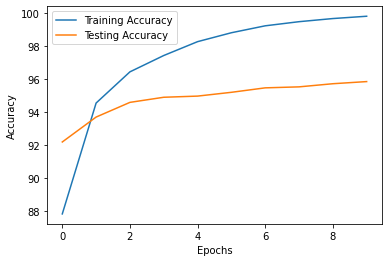

In [163]:
plt.plot(epochs, train_acc_store, label="Training Accuracy")
plt.plot(epochs, test_acc_store, label="Testing Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig('4_3_2.png')

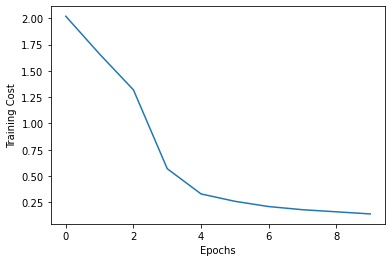

In [139]:
plt.plot(epochs, train_cost_store, label="Training Cost")
plt.xlabel("Epochs")
plt.ylabel("Training Cost")
plt.savefig('3_2_3.png')

## Keras

In [140]:
from keras.models import Sequential
from keras.layers.core import Dense

num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32').reshape(-1,784)
x_test = x_test.astype('float32').reshape(-1,784)

x_train /= 255.; x_test /= 255.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
model.add(Dense(512, activation='sigmoid',input_shape=(784,)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [141]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1942 - accuracy: 0.2556 - val_loss: 2.0361 - val_accuracy: 0.4466
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8912 - accuracy: 0.5701 - val_loss: 1.7238 - val_accuracy: 0.6561
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5865 - accuracy: 0.7019 - val_loss: 1.4184 - val_accuracy: 0.7441
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3053 - accuracy: 0.7616 - val_loss: 1.1565 - val_accuracy: 0.7942
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0765 - accuracy: 0.7957 - val_loss: 0.9574 - val_accuracy: 0.8188
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9075 - accuracy: 0.8190 - val_loss: 0.8143 - val_accuracy: 0.8346
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7862 - accuracy: 0.8353 - val_loss: 0.7127 - val_accuracy:

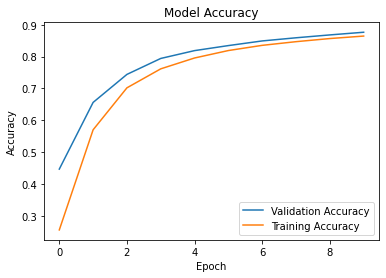

In [157]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.savefig('3_3_2.png')
plt.show()

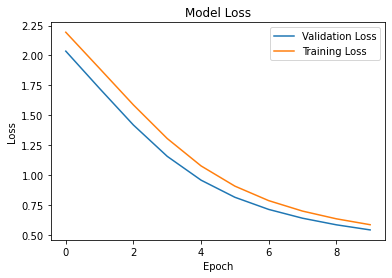

In [158]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.savefig('3_3_3.png')
plt.show()